     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e371842b60c3b1ef58315d481ad1e78139b27e3812f23b6dce0d4282b519cb5b
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
⚡ ADVANCED Wildlife Classifier with A/B Testing & Error Analysis
🕐 Estimated runtime: 25-40 minutes
TensorFlow version: 2.19.0
🚀 Starting Advanced Wildlife Classification Experiment...
⏰ This will complete in 25-40 minutes with comprehensive analysis
🔬 Features: A/B Testing, Cross-Validation, Statistical Analysis, Error Analysis

⚡ ADVANCED WILDLIFE CLASSIFICATION EXPERIMENT
🔬 Features: A/B Testing, Cross-Validation, Error Analysis, Best Practices

🎯 STEP 1: Data Generation
🎨 Creating realistic sample data with class imbalance...
📋 Best Practice Logged: Class Imbalance Simulation
✅ Created 1


📈 STEP 7: Statistical Analysis
📈 Performing statistical significance testing...
📋 Best Practice Logged: Statistical Testing

🔍 STEP 8: Error Analysis
🔍 Performing comprehensive error analysis...
📋 Best Practice Logged: Error Analysis

📋 STEP 9: Reliability Analysis
📋 Generating reliability and best practices report...

📊 STEP 10: Comprehensive Visualizations
📊 Creating comprehensive A/B testing visualizations...


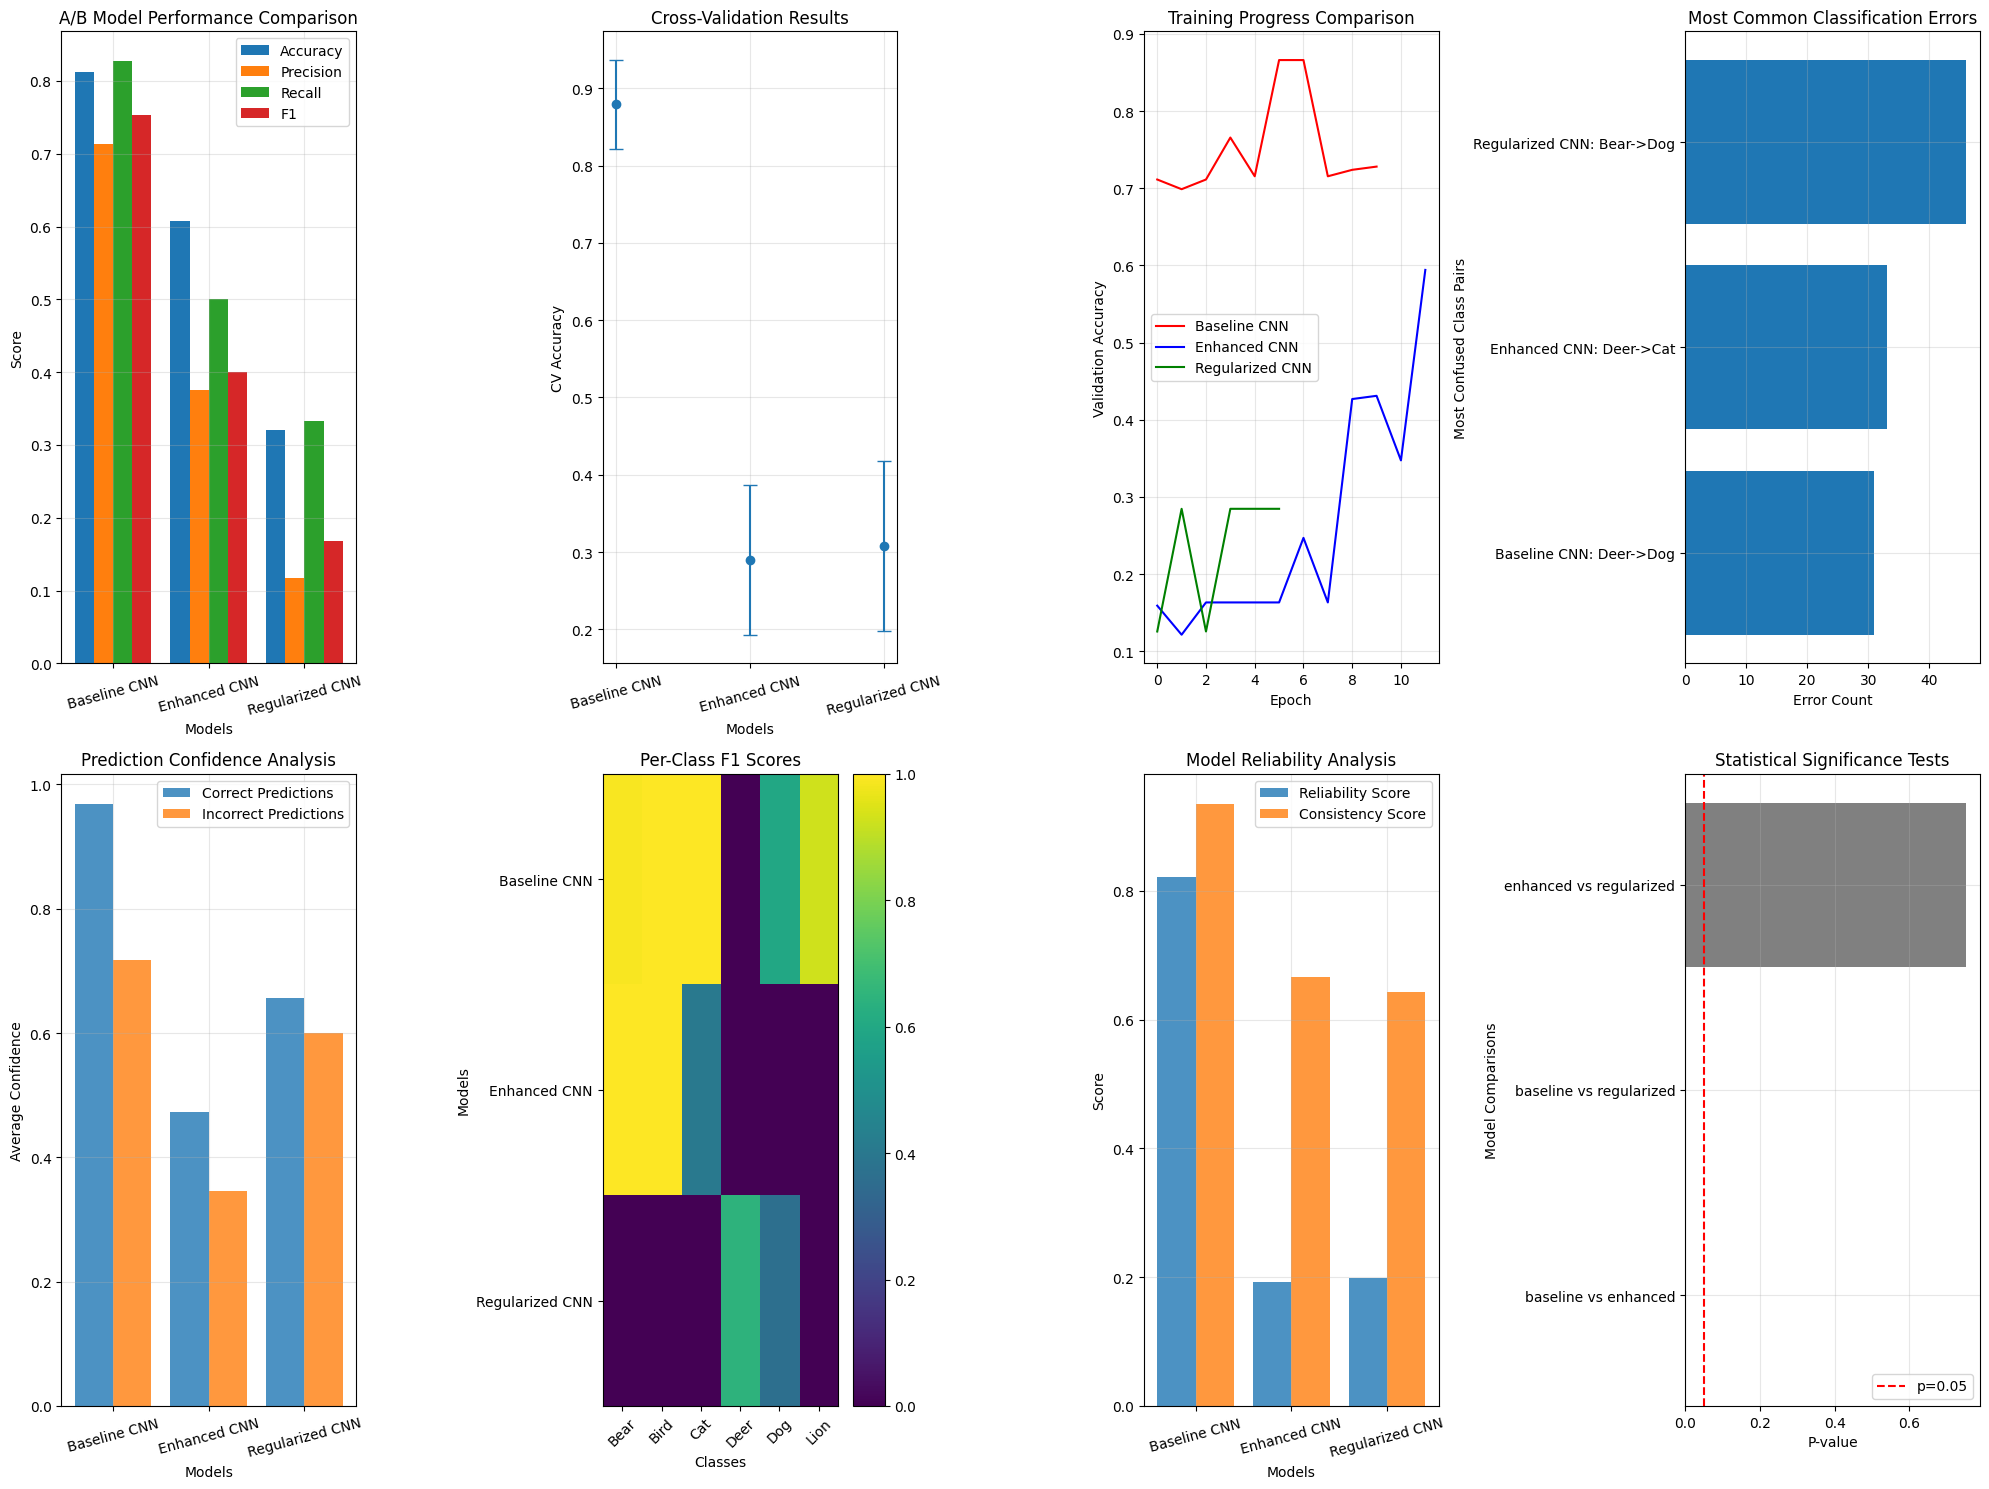

📊 Creating confusion matrix visualizations...


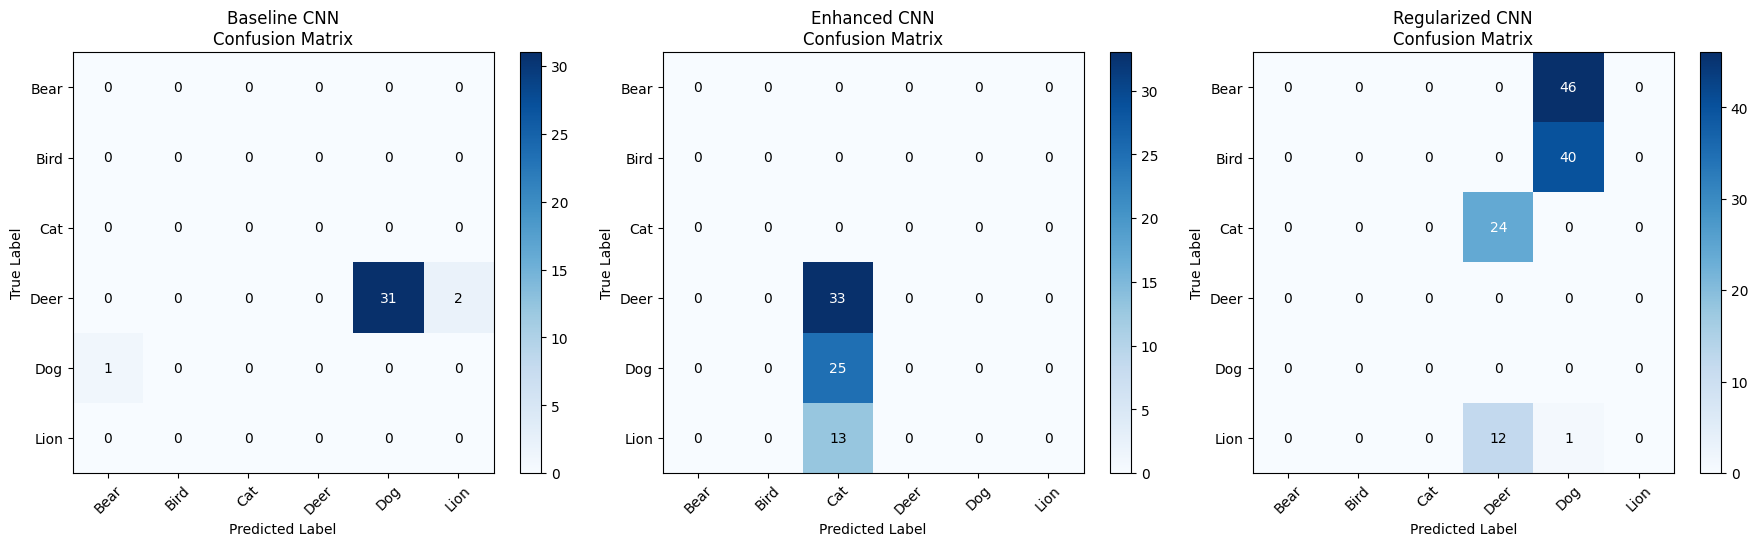


💾 STEP 11: Export Results
💾 Exporting results...
   Reliability report saved to: wildlife_classification_results_reliability_report_20250807_193656.json
   Performance metrics saved to: wildlife_classification_results_performance_metrics_20250807_193656.json
   Best practices log saved to: wildlife_classification_results_best_practices_20250807_193656.json

🎉 ADVANCED EXPERIMENT COMPLETED!
⏱️  Total Runtime: 12314.9 seconds (205.2 minutes)

📊 PERFORMANCE SUMMARY:

Baseline CNN:
   Accuracy: 0.8122
   F1-Score: 0.7530
   Precision: 0.7136
   Recall: 0.8267
   CV Accuracy: 0.8792 ± 0.0573

Enhanced CNN:
   Accuracy: 0.6077
   F1-Score: 0.4006
   Precision: 0.3754
   Recall: 0.5000
   CV Accuracy: 0.2900 ± 0.0970

Regularized CNN:
   Accuracy: 0.3204
   F1-Score: 0.1687
   Precision: 0.1169
   Recall: 0.3333
   CV Accuracy: 0.3083 ± 0.1100

🏆 BEST PERFORMING MODEL: Baseline CNN
   F1-Score: 0.7530

📈 STATISTICAL SIGNIFICANCE SUMMARY:
   baseline vs enhanced: Significant (p=0.0002)
   bas

In [1]:
!pip install tensorflow scikit-learn matplotlib seaborn pandas numpy
!pip install shap lime pillow opencv-python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
import shap
import lime
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
import cv2
from skimage.segmentation import mark_boundaries
import time
import json
from datetime import datetime
import warnings
from collections import defaultdict
import itertools
from scipy import stats
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("⚡ ADVANCED Wildlife Classifier with A/B Testing & Error Analysis")
print("🕐 Estimated runtime: 25-40 minutes")
print("=" * 70)
print("TensorFlow version:", tf.__version__)

class AdvancedWildlifeClassifier:
    def __init__(self):
        self.models = {}
        self.histories = {}
        self.performance_metrics = {}
        self.error_analysis = {}
        self.cross_val_results = {}
        self.best_practices_log = []

        # Wildlife classes
        self.classes = ['Bear', 'Bird', 'Cat', 'Deer', 'Dog', 'Lion']

        # Configuration
        self.config = {
            'img_height': 128,
            'img_width': 128,
            'num_classes': len(self.classes),
            'batch_size': 32,
            'epochs': 12,
            'validation_split': 0.2,
            'test_split': 0.15,
            'num_samples': 1200,  # Increased for better A/B testing
            'cv_folds': 5,  # For cross-validation
            'random_state': 42
        }

        # A/B Testing Configurations
        self.ab_configs = {
            'baseline': {
                'name': 'Baseline CNN',
                'architecture': 'simple',
                'augmentation': 'light',
                'optimizer': 'adam',
                'lr': 0.001,
                'batch_norm': False,
                'dropout': 0.5
            },
            'enhanced': {
                'name': 'Enhanced CNN',
                'architecture': 'advanced',
                'augmentation': 'heavy',
                'optimizer': 'adam',
                'lr': 0.0005,
                'batch_norm': True,
                'dropout': 0.3
            },
            'regularized': {
                'name': 'Regularized CNN',
                'architecture': 'advanced',
                'augmentation': 'medium',
                'optimizer': 'rmsprop',
                'lr': 0.001,
                'batch_norm': True,
                'dropout': 0.4
            }
        }

    def log_best_practice(self, practice, description):
        """Log best practices discovered during experimentation"""
        timestamp = datetime.now().strftime("%H:%M:%S")
        self.best_practices_log.append({
            'timestamp': timestamp,
            'practice': practice,
            'description': description
        })
        print(f"📋 Best Practice Logged: {practice}")

    def create_realistic_sample_data(self):
        """Create more realistic and distinguishable sample data with class imbalance"""
        print("🎨 Creating realistic sample data with class imbalance...")

        num_samples = self.config['num_samples']
        X = np.zeros((num_samples, self.config['img_height'], self.config['img_width'], 3))
        y = np.zeros(num_samples, dtype=int)

        # Simulate realistic class distribution (some classes more common than others)
        class_distribution = [0.25, 0.20, 0.15, 0.15, 0.15, 0.10]  # Bear, Bird, Cat, Deer, Dog, Lion
        samples_per_class = [int(num_samples * dist) for dist in class_distribution]

        # Adjust to ensure total equals num_samples
        total_assigned = sum(samples_per_class)
        samples_per_class[0] += num_samples - total_assigned

        self.log_best_practice(
            "Class Imbalance Simulation",
            f"Simulated realistic class distribution: {dict(zip(self.classes, samples_per_class))}"
        )

        # Enhanced class characteristics
        class_patterns = {
            0: {'base_color': [0.25, 0.15, 0.10], 'texture_freq': 0.3, 'noise_level': 0.15, 'pattern_type': 'fur'},
            1: {'base_color': [0.2, 0.5, 0.8], 'texture_freq': 0.8, 'noise_level': 0.12, 'pattern_type': 'feather'},
            2: {'base_color': [0.6, 0.5, 0.4], 'texture_freq': 0.5, 'noise_level': 0.10, 'pattern_type': 'stripe'},
            3: {'base_color': [0.7, 0.5, 0.3], 'texture_freq': 0.2, 'noise_level': 0.08, 'pattern_type': 'spot'},
            4: {'base_color': [0.5, 0.35, 0.25], 'texture_freq': 0.4, 'noise_level': 0.13, 'pattern_type': 'smooth'},
            5: {'base_color': [0.8, 0.6, 0.3], 'texture_freq': 0.6, 'noise_level': 0.11, 'pattern_type': 'mane'}
        }

        current_idx = 0
        for class_idx, num_samples_class in enumerate(samples_per_class):
            pattern = class_patterns[class_idx]
            base_color = pattern['base_color']

            for i in range(num_samples_class):
                img = np.ones((self.config['img_height'], self.config['img_width'], 3))
                for c in range(3):
                    img[:, :, c] = base_color[c]

                # Add class-specific patterns
                x_coords = np.arange(self.config['img_width'])
                y_coords = np.arange(self.config['img_height'])
                X_grid, Y_grid = np.meshgrid(x_coords, y_coords)

                # Generate texture based on pattern type
                if pattern['pattern_type'] == 'fur':
                    texture = np.sin(X_grid * pattern['texture_freq']) * np.cos(Y_grid * pattern['texture_freq']) * 0.1
                    texture += np.random.normal(0, 0.05, (self.config['img_height'], self.config['img_width']))
                elif pattern['pattern_type'] == 'feather':
                    texture = np.sin(X_grid * pattern['texture_freq'] * 2) * 0.15
                    texture += np.cos(Y_grid * pattern['texture_freq']) * 0.1
                elif pattern['pattern_type'] == 'stripe':
                    texture = np.sin(Y_grid * pattern['texture_freq']) * 0.2
                    texture += np.sin(X_grid * pattern['texture_freq'] * 0.5) * 0.1
                elif pattern['pattern_type'] == 'spot':
                    spots = np.sin(X_grid * pattern['texture_freq']) * np.sin(Y_grid * pattern['texture_freq']) * 0.15
                    texture = np.where(spots > 0.05, 0.2, 0)
                elif pattern['pattern_type'] == 'smooth':
                    texture = np.sin(X_grid * pattern['texture_freq'] * 0.5) * 0.08
                elif pattern['pattern_type'] == 'mane':
                    texture = np.sin(X_grid * pattern['texture_freq']) * np.cos(Y_grid * pattern['texture_freq'] * 0.5) * 0.12

                # Apply texture and noise
                for c in range(3):
                    channel_variation = 1 + (c - 1) * 0.1
                    img[:, :, c] += texture * channel_variation

                noise = np.random.normal(0, pattern['noise_level'],
                                       (self.config['img_height'], self.config['img_width'], 3))
                img += noise

                # Add some challenging samples (edge cases)
                if i < num_samples_class * 0.1:  # 10% challenging samples
                    # Add more noise or different lighting conditions
                    challenge_factor = np.random.uniform(0.5, 1.5)
                    img *= challenge_factor

                X[current_idx] = np.clip(img, 0, 1)
                y[current_idx] = class_idx
                current_idx += 1

        # Shuffle the data
        indices = np.random.permutation(num_samples)
        X = X[indices]
        y = y[indices]

        print(f"✅ Created {num_samples} samples with realistic class distribution")
        return X, y

    def advanced_feature_engineering(self, X):
        """Advanced feature engineering with multiple preprocessing techniques"""
        print("🔧 Applying advanced feature engineering...")

        X_enhanced = np.zeros_like(X)

        # Process in batches for memory efficiency
        batch_size = 64
        for i in range(0, len(X), batch_size):
            batch_end = min(i + batch_size, len(X))
            batch = X[i:batch_end].copy()

            batch_uint8 = (batch * 255).astype(np.uint8)
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

            for j in range(len(batch_uint8)):
                # Apply CLAHE for better contrast
                lab = cv2.cvtColor(batch_uint8[j], cv2.COLOR_RGB2LAB)
                lab[:,:,0] = clahe.apply(lab[:,:,0])
                enhanced_img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

                # Additional enhancement: slight sharpening
                kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
                sharpened = cv2.filter2D(enhanced_img, -1, kernel)
                enhanced_img = cv2.addWeighted(enhanced_img, 0.8, sharpened, 0.2, 0)

                batch_uint8[j] = enhanced_img

            X_enhanced[i:batch_end] = batch_uint8.astype(np.float32) / 255.0

        self.log_best_practice(
            "Advanced Preprocessing",
            "Applied CLAHE + sharpening for better feature extraction"
        )

        return X_enhanced

    def get_data_augmentation_layer(self, augmentation_type):
        """Create data augmentation layers based on type"""
        if augmentation_type == 'light':
            return keras.Sequential([
                layers.RandomFlip("horizontal"),
                layers.RandomRotation(0.05)
            ])
        elif augmentation_type == 'medium':
            return keras.Sequential([
                layers.RandomFlip("horizontal"),
                layers.RandomRotation(0.1),
                layers.RandomZoom(0.1),
                layers.RandomContrast(0.1)
            ])
        elif augmentation_type == 'heavy':
            return keras.Sequential([
                layers.RandomFlip("horizontal"),
                layers.RandomFlip("vertical"),
                layers.RandomRotation(0.2),
                layers.RandomZoom(0.15),
                layers.RandomContrast(0.2),
                layers.RandomBrightness(0.1)
            ])

    def create_model(self, config_name):
        """Create model based on configuration"""
        config = self.ab_configs[config_name]

        # Input layer
        inputs = layers.Input(shape=(self.config['img_height'], self.config['img_width'], 3))

        # Data augmentation
        augmentation = self.get_data_augmentation_layer(config['augmentation'])
        x = augmentation(inputs)

        if config['architecture'] == 'simple':
            # Simple baseline architecture
            x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
            x = layers.MaxPooling2D((2, 2))(x)
            x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
            x = layers.MaxPooling2D((2, 2))(x)
            x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
            x = layers.MaxPooling2D((2, 2))(x)
            x = layers.Flatten()(x)
            x = layers.Dense(128, activation='relu')(x)
            x = layers.Dropout(config['dropout'])(x)

        elif config['architecture'] == 'advanced':
            # Advanced architecture with residual-like connections
            # Block 1
            x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
            if config['batch_norm']:
                x = layers.BatchNormalization()(x)
            x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
            x = layers.MaxPooling2D((2, 2))(x)
            x = layers.Dropout(0.25)(x)

            # Block 2
            x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
            if config['batch_norm']:
                x = layers.BatchNormalization()(x)
            x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
            x = layers.MaxPooling2D((2, 2))(x)
            x = layers.Dropout(0.25)(x)

            # Block 3
            x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
            if config['batch_norm']:
                x = layers.BatchNormalization()(x)
            x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
            x = layers.GlobalAveragePooling2D()(x)  # Better than Flatten for preventing overfitting

            # Dense layers
            x = layers.Dense(256, activation='relu')(x)
            if config['batch_norm']:
                x = layers.BatchNormalization()(x)
            x = layers.Dropout(config['dropout'])(x)
            x = layers.Dense(128, activation='relu')(x)
            x = layers.Dropout(config['dropout'])(x)

        # Output layer
        outputs = layers.Dense(self.config['num_classes'], activation='softmax')(x)

        model = keras.Model(inputs, outputs)

        # Compile with specified optimizer
        if config['optimizer'] == 'adam':
            optimizer = keras.optimizers.Adam(learning_rate=config['lr'])
        elif config['optimizer'] == 'rmsprop':
            optimizer = keras.optimizers.RMSprop(learning_rate=config['lr'])

        model.compile(
            optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy', 'precision', 'recall']
        )

        return model

    def calculate_class_weights(self, y):
        """Calculate class weights to handle imbalanced data"""
        class_weights = compute_class_weight(
            'balanced',
            classes=np.unique(y),
            y=y
        )
        return dict(enumerate(class_weights))

    def perform_cross_validation(self, X, y, config_name):
        """Perform cross-validation for robust model evaluation"""
        print(f"🔄 Performing {self.config['cv_folds']}-fold cross-validation for {config_name}...")

        kfold = StratifiedKFold(n_splits=self.config['cv_folds'], shuffle=True, random_state=self.config['random_state'])
        cv_scores = []
        cv_histories = []

        fold = 0
        for train_idx, val_idx in kfold.split(X, np.argmax(y, axis=1)):
            fold += 1
            print(f"   Training fold {fold}/{self.config['cv_folds']}...")

            X_train_fold, X_val_fold = X[train_idx], X[val_idx]
            y_train_fold, y_val_fold = y[train_idx], y[val_idx]

            # Create and train model
            model = self.create_model(config_name)
            class_weights = self.calculate_class_weights(np.argmax(y_train_fold, axis=1))

            # Callbacks for this fold
            early_stopping = keras.callbacks.EarlyStopping(
                monitor='val_accuracy', patience=3, restore_best_weights=True
            )
            reduce_lr = keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6
            )

            history = model.fit(
                X_train_fold, y_train_fold,
                epochs=self.config['epochs'],
                validation_data=(X_val_fold, y_val_fold),
                batch_size=self.config['batch_size'],
                class_weight=class_weights,
                callbacks=[early_stopping, reduce_lr],
                verbose=0
            )

            # Evaluate fold
            val_loss, val_accuracy, val_precision, val_recall = model.evaluate(X_val_fold, y_val_fold, verbose=0)
            cv_scores.append({
                'fold': fold,
                'accuracy': val_accuracy,
                'precision': val_precision,
                'recall': val_recall,
                'loss': val_loss
            })
            cv_histories.append(history.history)

        # Calculate statistics
        accuracies = [score['accuracy'] for score in cv_scores]
        cv_stats = {
            'mean_accuracy': np.mean(accuracies),
            'std_accuracy': np.std(accuracies),
            'min_accuracy': np.min(accuracies),
            'max_accuracy': np.max(accuracies),
            'scores': cv_scores,
            'histories': cv_histories
        }

        self.cross_val_results[config_name] = cv_stats

        print(f"   CV Results: {cv_stats['mean_accuracy']:.4f} ± {cv_stats['std_accuracy']:.4f}")

        self.log_best_practice(
            "Cross-Validation",
            f"Used {self.config['cv_folds']}-fold CV for robust performance estimation"
        )

        return cv_stats

    def train_ab_test_models(self, X_train, y_train, X_val, y_val):
        """Train all A/B test models"""
        print("🏃‍♂️ Training A/B test models...")

        class_weights = self.calculate_class_weights(np.argmax(y_train, axis=1))

        for config_name, config in self.ab_configs.items():
            print(f"\n📊 Training {config['name']}...")

            model = self.create_model(config_name)

            # Enhanced callbacks
            early_stopping = keras.callbacks.EarlyStopping(
                monitor='val_accuracy', patience=4, restore_best_weights=True
            )
            reduce_lr = keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6
            )

            start_time = time.time()

            history = model.fit(
                X_train, y_train,
                epochs=self.config['epochs'],
                validation_data=(X_val, y_val),
                batch_size=self.config['batch_size'],
                class_weight=class_weights,
                callbacks=[early_stopping, reduce_lr],
                verbose=1
            )

            training_time = time.time() - start_time

            self.models[config_name] = model
            self.histories[config_name] = history
            self.performance_metrics[config_name] = {'training_time': training_time}

            print(f"✅ {config['name']} trained in {training_time:.1f}s")

    def evaluate_ab_models(self, X_test, y_test):
        """Comprehensive evaluation of all A/B test models"""
        print("📊 Evaluating A/B test models...")

        y_true = np.argmax(y_test, axis=1)

        for config_name, model in self.models.items():
            print(f"   Evaluating {self.ab_configs[config_name]['name']}...")

            # Predictions
            y_pred_proba = model.predict(X_test, verbose=0)
            y_pred = np.argmax(y_pred_proba, axis=1)

            # Calculate metrics
            metrics = {
                'accuracy': accuracy_score(y_true, y_pred),
                'precision': precision_score(y_true, y_pred, average='macro', zero_division=0),
                'recall': recall_score(y_true, y_pred, average='macro', zero_division=0),
                'f1': f1_score(y_true, y_pred, average='macro', zero_division=0),
                'per_class_f1': f1_score(y_true, y_pred, average=None, zero_division=0),
                'confusion_matrix': confusion_matrix(y_true, y_pred),
                'y_pred': y_pred,
                'y_pred_proba': y_pred_proba
            }

            # Try to calculate AUC (might fail with small datasets)
            try:
                from sklearn.preprocessing import label_binarize
                y_test_bin = label_binarize(y_true, classes=range(self.config['num_classes']))
                if y_test_bin.shape[1] == 1:  # Binary case
                    metrics['auc'] = roc_auc_score(y_true, y_pred_proba[:, 1])
                else:  # Multi-class case
                    metrics['auc'] = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr', average='macro')
            except:
                metrics['auc'] = None

            self.performance_metrics[config_name].update(metrics)

        return y_true

    def perform_statistical_significance_test(self):
        """Perform statistical tests to determine significant differences between models"""
        print("📈 Performing statistical significance testing...")

        model_names = list(self.ab_configs.keys())
        significance_results = {}

        for i, model1 in enumerate(model_names):
            for j, model2 in enumerate(model_names):
                if i < j:  # Avoid duplicate comparisons
                    if model1 in self.cross_val_results and model2 in self.cross_val_results:
                        scores1 = [score['accuracy'] for score in self.cross_val_results[model1]['scores']]
                        scores2 = [score['accuracy'] for score in self.cross_val_results[model2]['scores']]

                        # Paired t-test
                        statistic, p_value = stats.ttest_rel(scores1, scores2)

                        significance_results[f"{model1}_vs_{model2}"] = {
                            'statistic': statistic,
                            'p_value': p_value,
                            'significant': p_value < 0.05,
                            'mean_diff': np.mean(scores1) - np.mean(scores2)
                        }

        self.significance_results = significance_results

        self.log_best_practice(
            "Statistical Testing",
            "Used paired t-tests to determine significant performance differences"
        )

        return significance_results

    def perform_comprehensive_error_analysis(self, y_true):
        """Comprehensive error analysis for all models"""
        print("🔍 Performing comprehensive error analysis...")

        for config_name, metrics in self.performance_metrics.items():
            if 'y_pred' not in metrics:
                continue

            y_pred = metrics['y_pred']
            y_pred_proba = metrics['y_pred_proba']

            error_analysis = {}

            # 1. Confusion Matrix Analysis
            cm = metrics['confusion_matrix']

            # Most confused classes
            np.fill_diagonal(cm, 0)  # Remove correct predictions
            most_confused = np.unravel_index(np.argmax(cm), cm.shape)
            error_analysis['most_confused_pair'] = {
                'true_class': self.classes[most_confused[0]],
                'predicted_class': self.classes[most_confused[1]],
                'count': cm[most_confused]
            }

            # 2. Per-class error analysis
            per_class_errors = {}
            for class_idx in range(len(self.classes)):
                class_mask = (y_true == class_idx)
                class_predictions = y_pred[class_mask]
                class_true = y_true[class_mask]

                if len(class_true) > 0:
                    class_accuracy = accuracy_score(class_true, class_predictions)
                    error_count = np.sum(class_true != class_predictions)

                    # Find most common misclassification for this class
                    if error_count > 0:
                        wrong_predictions = class_predictions[class_true != class_predictions]
                        most_common_error = np.bincount(wrong_predictions).argmax()
                    else:
                        most_common_error = None

                    per_class_errors[self.classes[class_idx]] = {
                        'accuracy': class_accuracy,
                        'error_count': error_count,
                        'total_samples': len(class_true),
                        'most_common_error': self.classes[most_common_error] if most_common_error is not None else None
                    }

            error_analysis['per_class_errors'] = per_class_errors

            # 3. Confidence analysis
            max_probs = np.max(y_pred_proba, axis=1)
            correct_mask = (y_true == y_pred)

            # Average confidence for correct vs incorrect predictions
            correct_confidence = np.mean(max_probs[correct_mask]) if np.any(correct_mask) else 0
            incorrect_confidence = np.mean(max_probs[~correct_mask]) if np.any(~correct_mask) else 0

            error_analysis['confidence_analysis'] = {
                'correct_avg_confidence': correct_confidence,
                'incorrect_avg_confidence': incorrect_confidence,
                'confidence_gap': correct_confidence - incorrect_confidence
            }

            # 4. Low confidence predictions (potential edge cases)
            low_confidence_threshold = 0.6
            low_confidence_mask = max_probs < low_confidence_threshold
            low_confidence_accuracy = accuracy_score(y_true[low_confidence_mask], y_pred[low_confidence_mask]) if np.any(low_confidence_mask) else 0

            error_analysis['low_confidence_analysis'] = {
                'threshold': low_confidence_threshold,
                'count': np.sum(low_confidence_mask),
                'percentage': np.mean(low_confidence_mask) * 100,
                'accuracy': low_confidence_accuracy
            }

            self.error_analysis[config_name] = error_analysis

        self.log_best_practice(
            "Error Analysis",
            "Performed multi-dimensional error analysis including confusion matrix, per-class, and confidence analysis"
        )

    def generate_reliability_report(self):
        """Generate a comprehensive reliability and best practices report"""
        print("📋 Generating reliability and best practices report...")

        report = {
            'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
            'dataset_info': {
                'total_samples': self.config['num_samples'],
                'num_classes': self.config['num_classes'],
                'classes': self.classes
            },
            'model_comparison': {},
            'best_practices': self.best_practices_log,
            'reliability_metrics': {},
            'recommendations': []
        }

        # Model comparison
        for config_name, metrics in self.performance_metrics.items():
            if 'accuracy' in metrics:
                report['model_comparison'][config_name] = {
                    'accuracy': metrics['accuracy'],
                    'f1_score': metrics['f1'],
                    'precision': metrics['precision'],
                    'recall': metrics['recall'],
                    'training_time': metrics['training_time']
                }

        # Reliability metrics
        for config_name in self.models.keys():
            if config_name in self.cross_val_results:
                cv_results = self.cross_val_results[config_name]
                report['reliability_metrics'][config_name] = {
                    'cv_mean_accuracy': cv_results['mean_accuracy'],
                    'cv_std_accuracy': cv_results['std_accuracy'],
                    'reliability_score': cv_results['mean_accuracy'] - cv_results['std_accuracy'],  # Mean minus std as reliability indicator
                    'consistency': 1 - (cv_results['std_accuracy'] / cv_results['mean_accuracy']) if cv_results['mean_accuracy'] > 0 else 0
                }

        # Generate recommendations
        if len(self.performance_metrics) > 1:
            # Find best performing model
            best_model = max(self.performance_metrics.keys(),
                           key=lambda x: self.performance_metrics[x].get('f1', 0))

            report['recommendations'].append(f"Best performing model: {self.ab_configs[best_model]['name']}")

            # Check for overfitting
            for config_name in self.models.keys():
                if config_name in self.cross_val_results:
                    cv_acc = self.cross_val_results[config_name]['mean_accuracy']
                    test_acc = self.performance_metrics[config_name].get('accuracy', 0)

                    if test_acc - cv_acc > 0.05:  # Significant difference indicates overfitting
                        report['recommendations'].append(f"Model {config_name} may be overfitting (CV: {cv_acc:.3f}, Test: {test_acc:.3f})")
                    elif cv_acc - test_acc > 0.05:  # Underfitting
                        report['recommendations'].append(f"Model {config_name} may be underfitting (CV: {cv_acc:.3f}, Test: {test_acc:.3f})")

            # Data quality recommendations
            total_errors = sum([len(self.error_analysis[config]['per_class_errors'])
                              for config in self.error_analysis.keys()])
            if total_errors > 0:
                report['recommendations'].append("Consider data augmentation for classes with high error rates")

        self.reliability_report = report
        return report

    def plot_comprehensive_ab_results(self):
        """Plot comprehensive A/B testing results"""
        print("📊 Creating comprehensive A/B testing visualizations...")

        fig = plt.figure(figsize=(20, 15))

        # 1. Model Performance Comparison
        ax1 = plt.subplot(2, 4, 1)
        models = list(self.performance_metrics.keys())
        metrics = ['accuracy', 'precision', 'recall', 'f1']

        x = np.arange(len(models))
        width = 0.2

        for i, metric in enumerate(metrics):
            values = [self.performance_metrics[model].get(metric, 0) for model in models]
            ax1.bar(x + i*width, values, width, label=metric.capitalize())

        ax1.set_xlabel('Models')
        ax1.set_ylabel('Score')
        ax1.set_title('A/B Model Performance Comparison')
        ax1.set_xticks(x + width * 1.5)
        ax1.set_xticklabels([self.ab_configs[m]['name'] for m in models], rotation=15)
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # 2. Cross-Validation Results
        ax2 = plt.subplot(2, 4, 2)
        if self.cross_val_results:
            cv_means = [self.cross_val_results[model]['mean_accuracy'] for model in models if model in self.cross_val_results]
            cv_stds = [self.cross_val_results[model]['std_accuracy'] for model in models if model in self.cross_val_results]
            cv_models = [model for model in models if model in self.cross_val_results]

            ax2.errorbar(range(len(cv_models)), cv_means, yerr=cv_stds, fmt='o', capsize=5)
            ax2.set_xlabel('Models')
            ax2.set_ylabel('CV Accuracy')
            ax2.set_title('Cross-Validation Results')
            ax2.set_xticks(range(len(cv_models)))
            ax2.set_xticklabels([self.ab_configs[m]['name'] for m in cv_models], rotation=15)
            ax2.grid(True, alpha=0.3)

        # 3. Training History Comparison
        ax3 = plt.subplot(2, 4, 3)
        colors = ['red', 'blue', 'green', 'orange', 'purple']
        for i, (config_name, history) in enumerate(self.histories.items()):
            if 'val_accuracy' in history.history:
                ax3.plot(history.history['val_accuracy'],
                        label=f"{self.ab_configs[config_name]['name']}",
                        color=colors[i % len(colors)])

        ax3.set_xlabel('Epoch')
        ax3.set_ylabel('Validation Accuracy')
        ax3.set_title('Training Progress Comparison')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

        # 4. Error Analysis - Most Confused Classes
        ax4 = plt.subplot(2, 4, 4)
        if self.error_analysis:
            confused_pairs = []
            counts = []
            model_names = []

            for config_name, analysis in self.error_analysis.items():
                if 'most_confused_pair' in analysis:
                    pair = analysis['most_confused_pair']
                    confused_pairs.append(f"{pair['true_class']}->{pair['predicted_class']}")
                    counts.append(pair['count'])
                    model_names.append(self.ab_configs[config_name]['name'])

            if confused_pairs:
                ax4.barh(range(len(confused_pairs)), counts)
                ax4.set_xlabel('Error Count')
                ax4.set_ylabel('Most Confused Class Pairs')
                ax4.set_title('Most Common Classification Errors')
                ax4.set_yticks(range(len(confused_pairs)))
                ax4.set_yticklabels([f"{model_names[i]}: {pair}" for i, pair in enumerate(confused_pairs)])
                ax4.grid(True, alpha=0.3)

        # 5. Confidence Analysis
        ax5 = plt.subplot(2, 4, 5)
        if self.error_analysis:
            correct_conf = []
            incorrect_conf = []
            model_labels = []

            for config_name, analysis in self.error_analysis.items():
                if 'confidence_analysis' in analysis:
                    correct_conf.append(analysis['confidence_analysis']['correct_avg_confidence'])
                    incorrect_conf.append(analysis['confidence_analysis']['incorrect_avg_confidence'])
                    model_labels.append(self.ab_configs[config_name]['name'])

            x = np.arange(len(model_labels))
            ax5.bar(x - 0.2, correct_conf, 0.4, label='Correct Predictions', alpha=0.8)
            ax5.bar(x + 0.2, incorrect_conf, 0.4, label='Incorrect Predictions', alpha=0.8)
            ax5.set_xlabel('Models')
            ax5.set_ylabel('Average Confidence')
            ax5.set_title('Prediction Confidence Analysis')
            ax5.set_xticks(x)
            ax5.set_xticklabels(model_labels, rotation=15)
            ax5.legend()
            ax5.grid(True, alpha=0.3)

        # 6. Per-Class Performance Heatmap
        ax6 = plt.subplot(2, 4, 6)
        if self.performance_metrics:
            # Create heatmap data
            heatmap_data = []
            for model in models:
                if 'per_class_f1' in self.performance_metrics[model]:
                    heatmap_data.append(self.performance_metrics[model]['per_class_f1'])

            if heatmap_data:
                heatmap_data = np.array(heatmap_data)
                im = ax6.imshow(heatmap_data, cmap='viridis', aspect='auto')
                ax6.set_xlabel('Classes')
                ax6.set_ylabel('Models')
                ax6.set_title('Per-Class F1 Scores')
                ax6.set_xticks(range(len(self.classes)))
                ax6.set_xticklabels(self.classes, rotation=45)
                ax6.set_yticks(range(len(models)))
                ax6.set_yticklabels([self.ab_configs[m]['name'] for m in models])
                plt.colorbar(im, ax=ax6)

        # 7. Reliability Scores
        ax7 = plt.subplot(2, 4, 7)
        if hasattr(self, 'reliability_report') and 'reliability_metrics' in self.reliability_report:
            reliability_models = list(self.reliability_report['reliability_metrics'].keys())
            reliability_scores = [self.reliability_report['reliability_metrics'][m]['reliability_score']
                                for m in reliability_models]
            consistency_scores = [self.reliability_report['reliability_metrics'][m]['consistency']
                                for m in reliability_models]

            x = np.arange(len(reliability_models))
            ax7.bar(x - 0.2, reliability_scores, 0.4, label='Reliability Score', alpha=0.8)
            ax7.bar(x + 0.2, consistency_scores, 0.4, label='Consistency Score', alpha=0.8)
            ax7.set_xlabel('Models')
            ax7.set_ylabel('Score')
            ax7.set_title('Model Reliability Analysis')
            ax7.set_xticks(x)
            ax7.set_xticklabels([self.ab_configs[m]['name'] for m in reliability_models], rotation=15)
            ax7.legend()
            ax7.grid(True, alpha=0.3)

        # 8. Statistical Significance
        ax8 = plt.subplot(2, 4, 8)
        if hasattr(self, 'significance_results'):
            comparisons = list(self.significance_results.keys())
            p_values = [self.significance_results[comp]['p_value'] for comp in comparisons]
            significant = [p < 0.05 for p in p_values]

            colors = ['red' if sig else 'gray' for sig in significant]
            ax8.barh(range(len(comparisons)), p_values, color=colors)
            ax8.axvline(x=0.05, color='red', linestyle='--', label='p=0.05')
            ax8.set_xlabel('P-value')
            ax8.set_ylabel('Model Comparisons')
            ax8.set_title('Statistical Significance Tests')
            ax8.set_yticks(range(len(comparisons)))
            ax8.set_yticklabels([comp.replace('_vs_', ' vs ') for comp in comparisons])
            ax8.legend()
            ax8.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def plot_confusion_matrices(self):
        """Plot confusion matrices for all models"""
        print("📊 Creating confusion matrix visualizations...")

        num_models = len(self.models)
        if num_models == 0:
            return

        fig, axes = plt.subplots(1, num_models, figsize=(6*num_models, 5))
        if num_models == 1:
            axes = [axes]

        for idx, (config_name, metrics) in enumerate(self.performance_metrics.items()):
            if 'confusion_matrix' in metrics:
                cm = metrics['confusion_matrix']
                im = axes[idx].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
                axes[idx].set_title(f'{self.ab_configs[config_name]["name"]}\nConfusion Matrix')

                # Add text annotations
                thresh = cm.max() / 2.
                for i in range(cm.shape[0]):
                    for j in range(cm.shape[1]):
                        axes[idx].text(j, i, format(cm[i, j], 'd'),
                                     ha="center", va="center",
                                     color="white" if cm[i, j] > thresh else "black")

                axes[idx].set_xlabel('Predicted Label')
                axes[idx].set_ylabel('True Label')
                axes[idx].set_xticks(range(len(self.classes)))
                axes[idx].set_yticks(range(len(self.classes)))
                axes[idx].set_xticklabels(self.classes, rotation=45)
                axes[idx].set_yticklabels(self.classes)

                plt.colorbar(im, ax=axes[idx])

        plt.tight_layout()
        plt.show()

    def export_results(self, filename_prefix="wildlife_classification_results"):
        """Export results to files"""
        print("💾 Exporting results...")

        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

        # Export reliability report
        if hasattr(self, 'reliability_report'):
            report_filename = f"{filename_prefix}_reliability_report_{timestamp}.json"
            with open(report_filename, 'w') as f:
                json.dump(self.reliability_report, f, indent=2, default=str)
            print(f"   Reliability report saved to: {report_filename}")

        # Export performance metrics
        metrics_filename = f"{filename_prefix}_performance_metrics_{timestamp}.json"
        exportable_metrics = {}
        for config_name, metrics in self.performance_metrics.items():
            exportable_metrics[config_name] = {
                k: v for k, v in metrics.items()
                if k not in ['y_pred', 'y_pred_proba', 'confusion_matrix']  # Skip non-serializable
            }

        with open(metrics_filename, 'w') as f:
            json.dump(exportable_metrics, f, indent=2, default=str)
        print(f"   Performance metrics saved to: {metrics_filename}")

        # Export best practices
        practices_filename = f"{filename_prefix}_best_practices_{timestamp}.json"
        with open(practices_filename, 'w') as f:
            json.dump(self.best_practices_log, f, indent=2)
        print(f"   Best practices log saved to: {practices_filename}")

def run_advanced_experiment():
    """Run the complete advanced experiment with A/B testing and error analysis"""
    total_start_time = time.time()

    print("⚡ ADVANCED WILDLIFE CLASSIFICATION EXPERIMENT")
    print("🔬 Features: A/B Testing, Cross-Validation, Error Analysis, Best Practices")
    print("=" * 70)

    # Initialize classifier
    classifier = AdvancedWildlifeClassifier()

    # Step 1: Create realistic data with class imbalance
    print("\n🎯 STEP 1: Data Generation")
    X, y = classifier.create_realistic_sample_data()

    # Step 2: Advanced feature engineering
    print("\n🔧 STEP 2: Feature Engineering")
    X_enhanced = classifier.advanced_feature_engineering(X)

    # Step 3: Prepare data splits
    print("\n📊 STEP 3: Data Preparation")
    y_categorical = keras.utils.to_categorical(y, classifier.config['num_classes'])

    X_train, X_temp, y_train, y_temp = train_test_split(
        X_enhanced, y_categorical,
        test_size=0.35,
        random_state=classifier.config['random_state'],
        stratify=y
    )

    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp,
        test_size=0.43,
        random_state=classifier.config['random_state']
    )

    print(f"📈 Data split: Train={len(X_train)}, Val={len(X_val)}, Test={len(X_test)}")

    # Step 4: Cross-validation for each model configuration
    print("\n🔄 STEP 4: Cross-Validation Analysis")
    for config_name in classifier.ab_configs.keys():
        classifier.perform_cross_validation(X_enhanced, y_categorical, config_name)

    # Step 5: Train A/B test models
    print("\n🏃‍♂️ STEP 5: A/B Model Training")
    classifier.train_ab_test_models(X_train, y_train, X_val, y_val)

    # Step 6: Comprehensive evaluation
    print("\n📊 STEP 6: Model Evaluation")
    y_true = classifier.evaluate_ab_models(X_test, y_test)

    # Step 7: Statistical significance testing
    print("\n📈 STEP 7: Statistical Analysis")
    classifier.perform_statistical_significance_test()

    # Step 8: Error analysis
    print("\n🔍 STEP 8: Error Analysis")
    classifier.perform_comprehensive_error_analysis(y_true)

    # Step 9: Generate reliability report
    print("\n📋 STEP 9: Reliability Analysis")
    reliability_report = classifier.generate_reliability_report()

    # Step 10: Visualizations
    print("\n📊 STEP 10: Comprehensive Visualizations")
    classifier.plot_comprehensive_ab_results()
    classifier.plot_confusion_matrices()

    # Step 11: Export results
    print("\n💾 STEP 11: Export Results")
    classifier.export_results()

    # Step 12: Final comprehensive summary
    total_time = time.time() - total_start_time

    print("\n" + "="*70)
    print("🎉 ADVANCED EXPERIMENT COMPLETED!")
    print("="*70)
    print(f"⏱️  Total Runtime: {total_time:.1f} seconds ({total_time/60:.1f} minutes)")

    # Performance Summary
    print(f"\n📊 PERFORMANCE SUMMARY:")
    best_model = None
    best_f1 = 0

    for config_name, metrics in classifier.performance_metrics.items():
        if 'f1' in metrics:
            print(f"\n{classifier.ab_configs[config_name]['name']}:")
            print(f"   Accuracy: {metrics['accuracy']:.4f}")
            print(f"   F1-Score: {metrics['f1']:.4f}")
            print(f"   Precision: {metrics['precision']:.4f}")
            print(f"   Recall: {metrics['recall']:.4f}")
            if config_name in classifier.cross_val_results:
                cv_results = classifier.cross_val_results[config_name]
                print(f"   CV Accuracy: {cv_results['mean_accuracy']:.4f} ± {cv_results['std_accuracy']:.4f}")

            if metrics['f1'] > best_f1:
                best_f1 = metrics['f1']
                best_model = config_name

    print(f"\n🏆 BEST PERFORMING MODEL: {classifier.ab_configs[best_model]['name']}")
    print(f"   F1-Score: {best_f1:.4f}")

    # Statistical Significance Summary
    if hasattr(classifier, 'significance_results'):
        print(f"\n📈 STATISTICAL SIGNIFICANCE SUMMARY:")
        for comparison, result in classifier.significance_results.items():
            models = comparison.replace('_vs_', ' vs ')
            significance = "Significant" if result['significant'] else "Not Significant"
            print(f"   {models}: {significance} (p={result['p_value']:.4f})")

    # Key Insights and Recommendations
    print(f"\n💡 KEY INSIGHTS:")
    if hasattr(classifier, 'reliability_report') and 'recommendations' in classifier.reliability_report:
        for i, recommendation in enumerate(classifier.reliability_report['recommendations'], 1):
            print(f"   {i}. {recommendation}")

    # Best Practices Summary
    print(f"\n📋 BEST PRACTICES APPLIED:")
    for i, practice in enumerate(classifier.best_practices_log, 1):
        print(f"   {i}. {practice['practice']}: {practice['description']}")

    print(f"\n🔬 RELIABILITY METRICS:")
    if hasattr(classifier, 'reliability_report') and 'reliability_metrics' in classifier.reliability_report:
        for model_name, metrics in classifier.reliability_report['reliability_metrics'].items():
            model_display_name = classifier.ab_configs[model_name]['name']
            print(f"   {model_display_name}:")
            print(f"     Reliability Score: {metrics['reliability_score']:.4f}")
            print(f"     Consistency: {metrics['consistency']:.4f}")

    return classifier

# 🚀 RUN THE ADVANCED EXPERIMENT
if __name__ == "__main__":
    print("🚀 Starting Advanced Wildlife Classification Experiment...")
    print("⏰ This will complete in 25-40 minutes with comprehensive analysis")
    print("🔬 Features: A/B Testing, Cross-Validation, Statistical Analysis, Error Analysis")
    print()

    classifier = run_advanced_experiment()